# Basic Exploration using numpy and pandas


In [112]:
# Importing the Libraries
import pandas as pd
import numpy as np

In [113]:
# Loading the dataset
dataset = pd.read_csv('Titanic-Dataset.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [114]:
# Shows top 5 rows in dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
# Information of dataset [col types, non-null count, data-type]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
# Statistical Summary of dataset
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [117]:
# Sum of null values in each feature
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [118]:
# Percentage of missing values
missing_percent = dataset.isnull().mean() * 100
print("Percentage of Missing Values:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))
print("\n")

Percentage of Missing Values:
Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64




In [119]:
# Survivial Count of passengers
dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [120]:
# Overall survival rate
survival_rate = dataset['Survived'].value_counts(normalize=True) * 100
print("Overall Survival Rate:")
print(survival_rate)
print("\n")

Overall Survival Rate:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64




In [121]:
# Distribution of Categorical Variables
categorical_cols = dataset.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}:\n{dataset[col].value_counts(dropna=False)}\n")

Name:
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Ticket:
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
N

# Data Cleaning

In [122]:
# Filling missing values 
dataset['Sex_encoded'] = dataset['Sex'].map({'male': 0, 'female': 1})  # Encode gender
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)  # Fill missing embark
dataset['Embarked_encoded'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
dataset.dropna(subset=['Age', 'Fare'], inplace=True)  # Drop rows with missing age/fare

C:\Users\meetv\AppData\Local\Temp\ipykernel_11004\2480634033.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)  # Fill missing embark


# Graphical Exploration

In [123]:
# Comparing survival rate by features
dataset.groupby('Sex')['Survived'].mean()
dataset.groupby('Pclass')['Survived'].mean()
dataset.pivot_table(index='Sex', columns='Pclass', values='Survived')

Pclass,1,2,3
Sex,,,
female,0.964706,0.918919,0.460784
male,0.396040,0.151515,0.150198


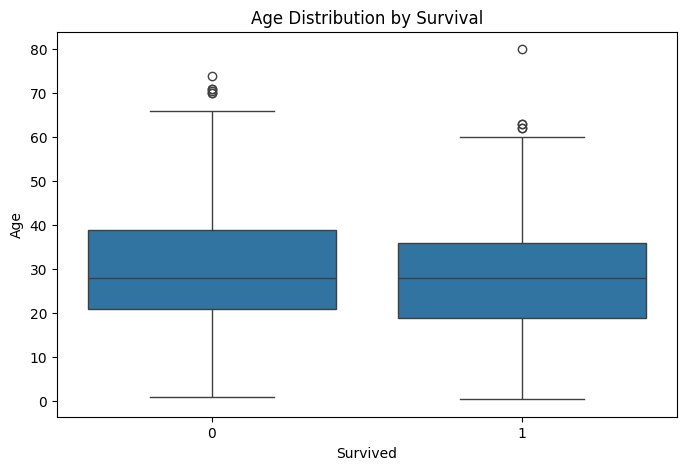

In [124]:
# Feature Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of Age vs Survival 
plt.figure(figsize=(8,5))
sns.boxplot(data=dataset, x='Survived', y='Age')
plt.title("Age Distribution by Survival")
plt.show()


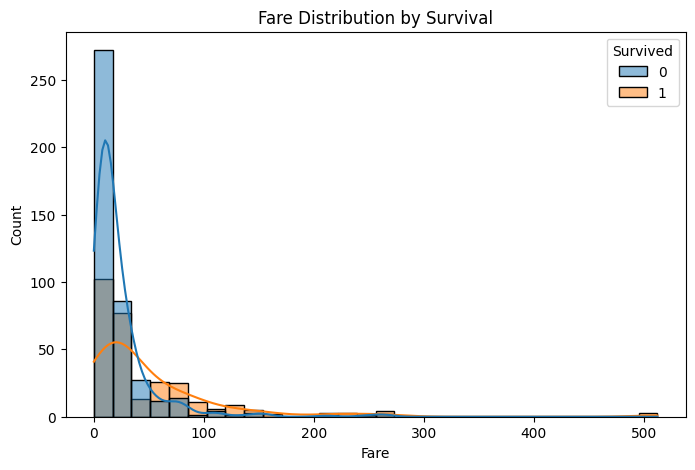

In [125]:
# Histogram of Fare with Survival hue
plt.figure(figsize=(8,5))
sns.histplot(data=dataset, x='Fare', bins=30, hue='Survived', kde=True)
plt.title("Fare Distribution by Survival")
plt.show()

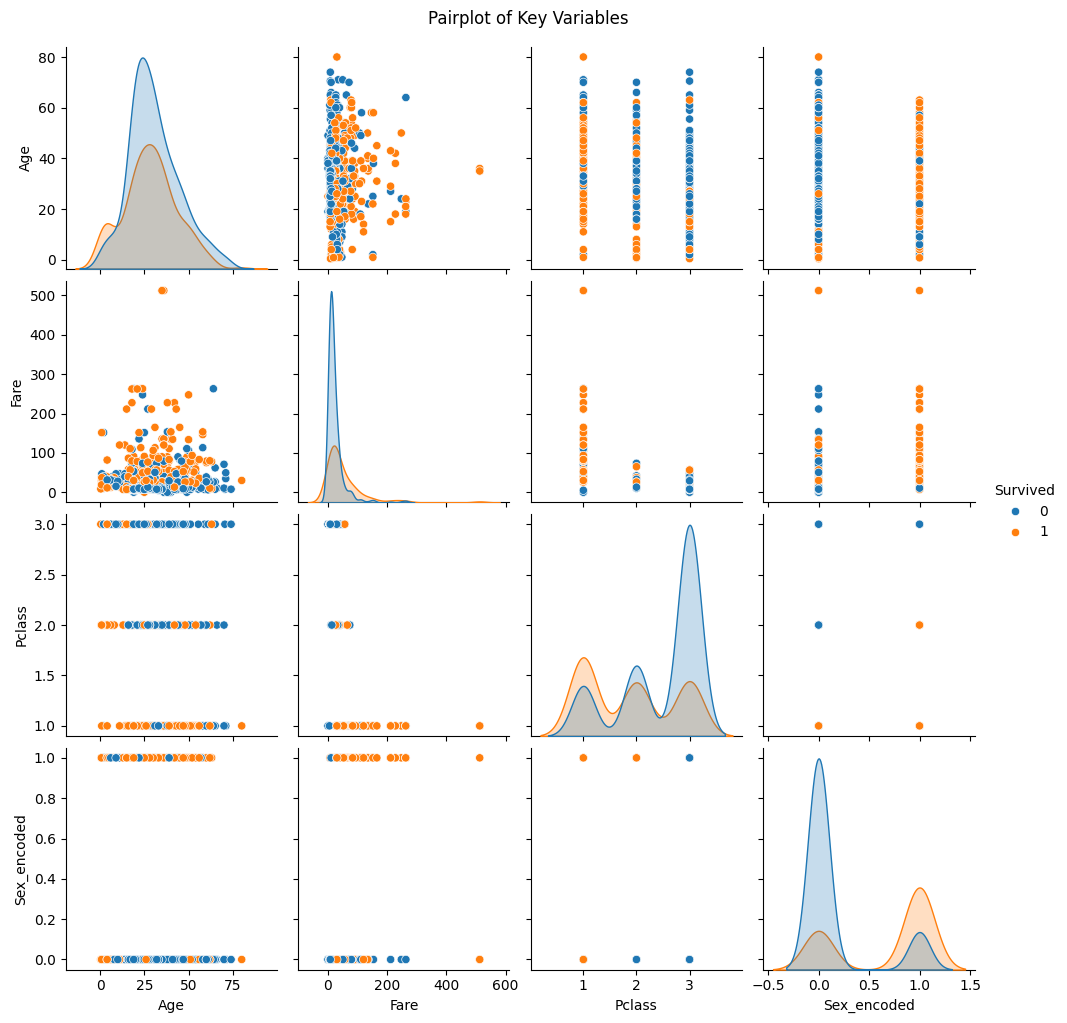

In [126]:
#  Pairplot (Multi-variable scatter comparison)
sns.pairplot(dataset[['Survived', 'Age', 'Fare', 'Pclass', 'Sex_encoded']], hue='Survived')
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()

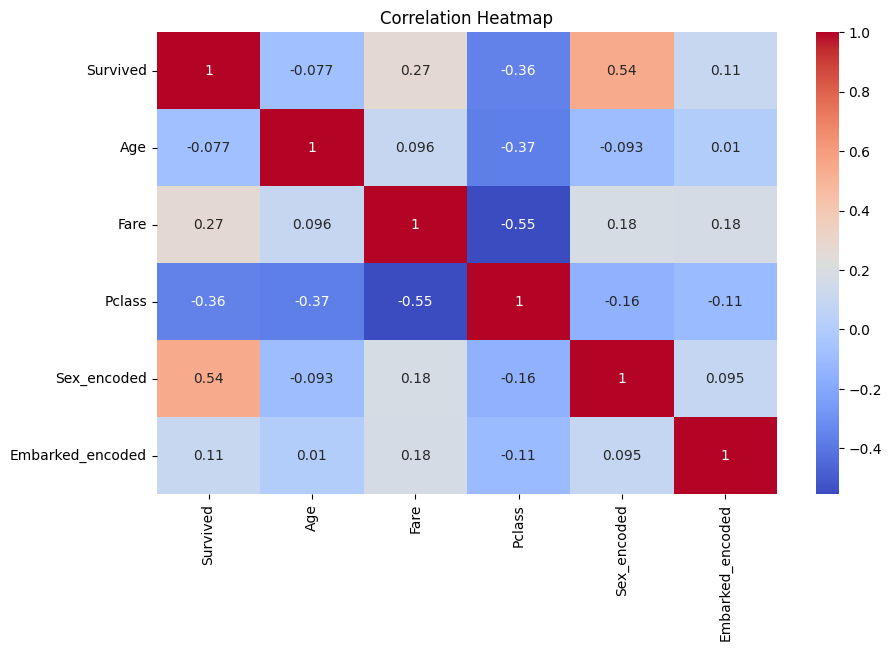

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dataset[['Survived', 'Age', 'Fare', 'Pclass', 'Sex_encoded', 'Embarked_encoded']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

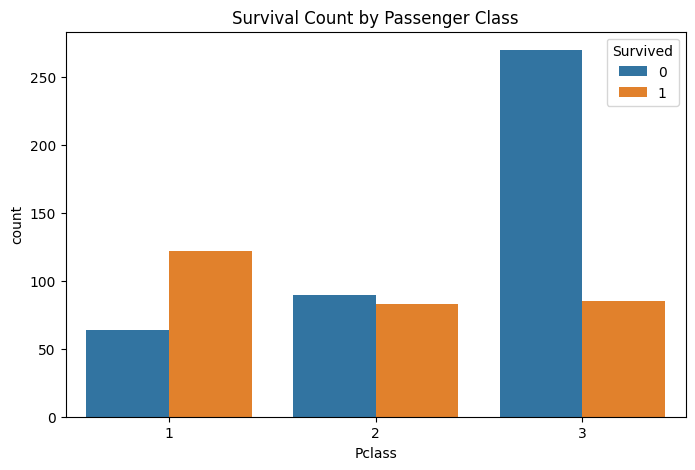

In [128]:
# Countplot of Passenger Class vs Survival 
plt.figure(figsize=(8,5))
sns.countplot(data=dataset, x='Pclass', hue='Survived')
plt.title("Survival Count by Passenger Class")
plt.show()


# Extra insights

In [129]:
# Family Size
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print("Sample FamilySize column:")
print(dataset[['SibSp', 'Parch', 'FamilySize']].head())


Sample FamilySize column:
   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [130]:
# Is Alone
dataset['IsAlone'] = (dataset['FamilySize'] == 1).astype(int)
print("Sample IsAlone column:")
print(dataset[['FamilySize', 'IsAlone']].head())

Sample IsAlone column:
   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


In [136]:
# Title Extraction from Name
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)', expand=False)
print("Sample extracted titles:")
print(dataset[['Name', 'Title']].head())

Sample extracted titles:
                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


In [132]:
# Categorize Age
dataset['AgeBin'] = pd.cut(dataset['Age'], bins=[0,12,18,35,60,80], labels=['Child','Teen','Adult','Middle-Age','Senior'])
print("Sample Age Bins:")
print(dataset[['Age', 'AgeBin']].head())

Sample Age Bins:
    Age      AgeBin
0  22.0       Adult
1  38.0  Middle-Age
2  26.0       Adult
3  35.0       Adult
4  35.0       Adult


In [133]:
# Chi-Square Tests (Categorical vs Target)
from scipy.stats import chi2_contingency
table = pd.crosstab(dataset['Sex'], dataset['Survived'])
chi2, p, dof, expected = chi2_contingency(table)


print("Chi-Square Test between Sex and Survived")
print(f"Chi2 value: {chi2:.2f}, p-value: {p:.4f}")

Chi-Square Test between Sex and Survived
Chi2 value: 205.03, p-value: 0.0000


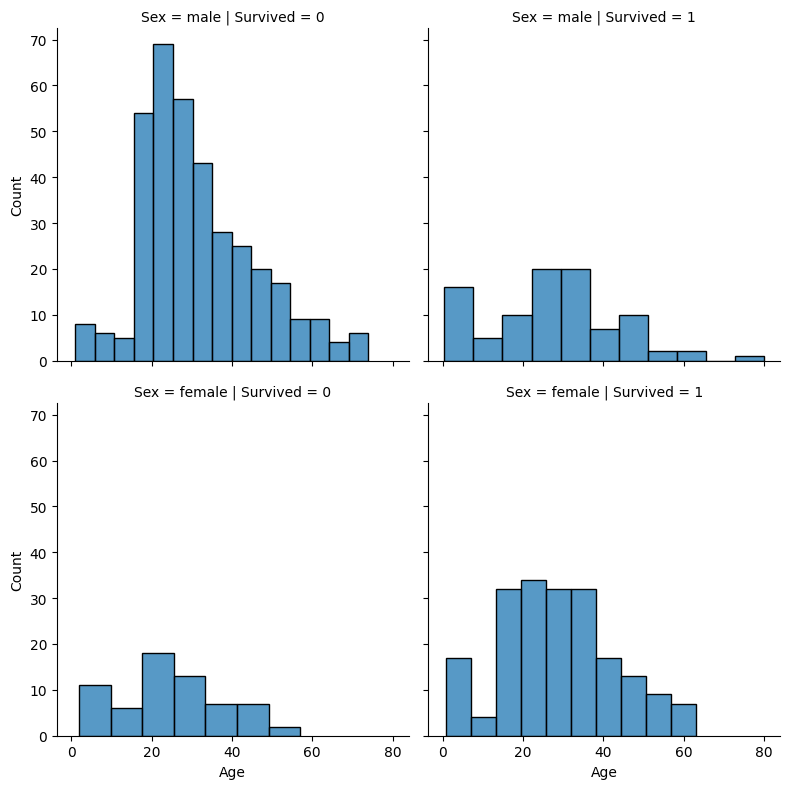

In [134]:
# FacetGrid Survival by Age & Sex:
g = sns.FacetGrid(dataset, col='Survived', row='Sex', height=4)
g.map(sns.histplot, 'Age')

<Axes: xlabel='Pclass', ylabel='Fare'>

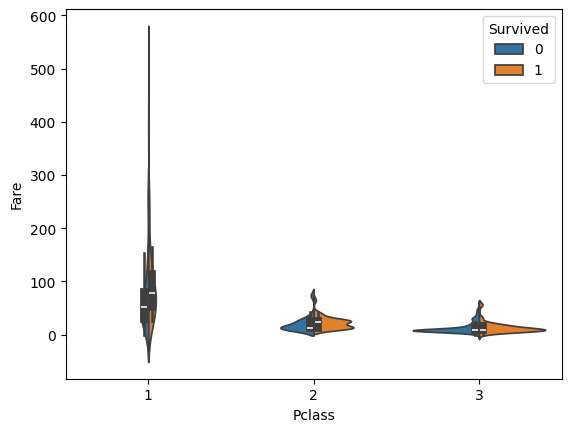

In [135]:
# Violin Plot for Fare vs Class vs Survived
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=dataset, split=True)